In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('C:/Users/ddj99/OneDrive/Desktop/bangalor house project/Bengaluru_House_Data.csv')

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
df.groupby(['area_type']).count()

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [9]:
df1 = df.drop(['area_type','availability','society','balcony'],axis=1)

In [10]:
df1.shape

(13320, 5)

### DATA CLEANING

In [11]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df2 = df1.dropna()

In [13]:
df2.shape

(13246, 5)

In [14]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Feature Engineering

In [15]:
df2['BHK']=df2['size'].apply(lambda x:str(x).split(' ')[0])

C:\Users\ddj99\AppData\Local\Temp\ipykernel_16744\269004033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x:str(x).split(' ')[0])


In [16]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df2.drop('size',inplace=True,axis=1)

C:\Users\ddj99\AppData\Local\Temp\ipykernel_16744\1480533949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('size',inplace=True,axis=1)


In [18]:
df2

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [19]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [22]:
def conv_float(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
df3 = df2.copy()

In [24]:
df3['total_sqft'] = df3['total_sqft'].apply(conv_float)

In [25]:
df3['total_sqft'].dtype

dtype('float64')

In [26]:
df3.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [27]:
df3 = df3[df3['total_sqft'].notnull()]

In [28]:
df3.location.value_counts()

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [29]:
df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [30]:
df3['location'] = df3['location'].apply(lambda x:x.strip())

In [31]:
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [32]:
location_less_than10 = location_stats[location_stats<=10]
location_less_than10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [33]:
df4 = df3.copy()

In [34]:
df4['location'] = df4['location'].apply(lambda x:'Other' if x in location_less_than10 else x)

In [35]:
df4['location'].nunique()

241

In [36]:
df4.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [37]:
df4['price_sqft'] = df4.price*100000/df4.total_sqft

In [38]:
df4.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
BHK           0
price_sqft    0
dtype: int64

In [39]:
df5 = df4.copy()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   total_sqft  13200 non-null  float64
 2   bath        13200 non-null  float64
 3   price       13200 non-null  float64
 4   BHK         13200 non-null  object 
 5   price_sqft  13200 non-null  float64
dtypes: float64(4), object(2)
memory usage: 721.9+ KB


In [40]:
df5['BHK']=df5['BHK'].astype(float)
df5

,location,total_sqft,bath,price,BHK,price_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0,6689.834926
13316,Other,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0,10407.336319


### outlier removal

In [41]:
df6 = df5[~(df5['total_sqft']/df5['BHK']<300)]

In [42]:
df6

,location,total_sqft,bath,price,BHK,price_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0,6689.834926
13316,Other,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0,10407.336319


In [43]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_sqft)
        st = np.std(subdf.price_sqft)
        reduced_df = subdf[(subdf.price_sqft>(m-st)) & (subdf.price_sqft<=(m+st))]
        
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 6)

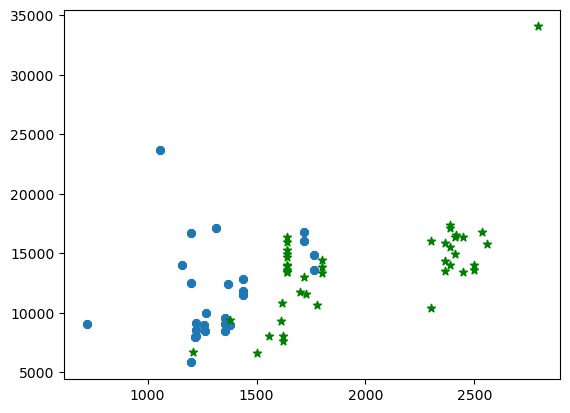

In [44]:
def scatt(location):
    x = df6['price_sqft'][(df6['BHK']==2)&(df6['location']==location)]
    x1 = df6['total_sqft'][(df6['BHK']==2)&(df6['location']==location)]
    y = df6['price_sqft'][(df6['BHK']==3)&(df6['location']==location)]
    y1 = df6['total_sqft'][(df6['BHK']==3)&(df6['location']==location)]
    plt.scatter(x1,x,marker = '8')
    plt.scatter(y1,y,marker = '*',color = 'green')

scatt('Rajaji Nagar')

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {'mean':np.mean(bhk_df.price_sqft),'std':np.std(bhk_df.price_sqft),'count':bhk_df.shape[0]}
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7317, 6)

In [46]:
df8[df8['bath']>df8['BHK']+2]

,location,total_sqft,bath,price,BHK,price_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4.0,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4.0,6428.571429
5851,Other,11338.0,9.0,1000.0,6.0,8819.897689
9017,Thanisandra,1806.0,6.0,116.0,3.0,6423.034330


In [47]:
df9 = df8[df8['bath']<df8['BHK']+2]

In [48]:
df9

,location,total_sqft,bath,price,BHK,price_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668
...,...,...,...,...,...,...
10231,Yeshwanthpur,1195.0,2.0,100.0,2.0,8368.200837
10232,Yeshwanthpur,1692.0,3.0,108.0,3.0,6382.978723
10234,Yeshwanthpur,2500.0,5.0,185.0,6.0,7400.000000
10239,Yeshwanthpur,1855.0,3.0,135.0,3.0,7277.628032


In [49]:
df10 = df9.drop('price_sqft',axis=1)

In [50]:
df10

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0
...,...,...,...,...,...
10231,Yeshwanthpur,1195.0,2.0,100.0,2.0
10232,Yeshwanthpur,1692.0,3.0,108.0,3.0
10234,Yeshwanthpur,2500.0,5.0,185.0,6.0
10239,Yeshwanthpur,1855.0,3.0,135.0,3.0


In [51]:
dummies = pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
df11 = pd.concat([df10,dummies.drop('Other',axis=1)],axis=1)

In [53]:
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df12 = df11.drop('location',axis=1)

In [55]:
df12

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,1195.0,2.0,100.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10232,1692.0,3.0,108.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,2500.0,5.0,185.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,1855.0,3.0,135.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [57]:
x = df12.drop('price',axis=1)
y = df12['price']

In [58]:
x.shape

(7239, 243)

In [59]:
y.shape

(7239,)

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=1)

In [61]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [62]:
linear.score(x_test,y_test)

0.8521345963177491

In [64]:
price_pred = linear.predict(x_test)

In [68]:
price_pred

array([ 25.86571435,  57.02630921,  72.64113238, ..., 204.6491657 ,
        53.21754929, 158.62092381])